##1. Đọc dữ liệu và fillna

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df.target = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['age'] = df.age.fillna(df.age.mean())

##2. Vẽ biểu đồ thể hiện mối quan hệ giữa tuổi và khả năng bị bệnh tim

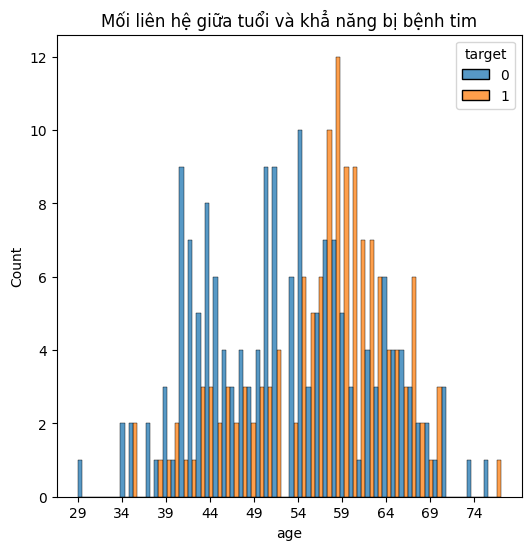

In [7]:
plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='age', hue='target', multiple='dodge', bins=50)
plt.title('Mối liên hệ giữa tuổi và khẳ năng bị bệnh tim')
plt.xticks(np.arange(np.min(df['age']), np.max(df['age']) + 1, 5))
plt.show()

##3. Vẽ biểu đồ thể hiện mối quan hệ giữa tuổi, giới tính và khả năng bị bệnh tim

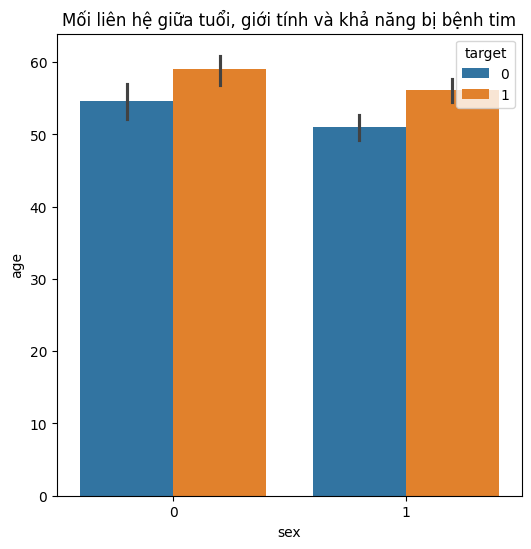

In [10]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='sex', y='age', hue='target')
plt.title('Mối liên hệ giữa tuổi, giới tính và khả năng bị bệnh tim')
plt.show()

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [22]:
df['ca'] = df.ca.fillna(df.ca.mean())

In [23]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


##4. Thực hiện dự đoán với model KNN

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5,
                            weights='uniform',
                            algorithm='auto',
                            leaf_size=30,
                            p=2,
                            metric='minkowski')
model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
# print(accuracy_score(y_pred_test, y_test))
# print(accuracy_score(y_pred_train, y_train))

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(accuracy_for_train)
print(accuracy_for_test)

0.76
0.69


##5. Thực hiện dự đoán với model SVM

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
model = SVC(kernel='rbf',
            random_state=42)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

accuracy_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print(accuracy_train)
print(accuracy_test)

0.66
0.67


##6. Thực hiện dự đoán với NB

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(np.round(accuracy_score(y_train, y_pred_train), 2))
print(np.round(accuracy_score(y_test, y_pred_test), 2))

0.85
0.84


##7. Thực hiện dự đoán với DT

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
model = DecisionTreeClassifier(criterion='gini',
                               max_depth=10,
                               min_samples_split=2)

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(np.round(accuracy_score(y_train, y_pred_train), 2))
print(np.round(accuracy_score(y_test, y_pred_test), 2))

1.0
0.74


##8. Thực hiện dự đoán với RF

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
model = RandomForestClassifier(criterion='gini',
                               max_depth=10,
                               min_samples_split=2,
                               n_estimators=10,
                               random_state=42)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(np.round(accuracy_score(y_train, y_pred_train), 2))
print(np.round(accuracy_score(y_test, y_pred_test), 2))

0.98
0.8


##9. Thực hiện dự đoán với AdaBoost

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
model = AdaBoostClassifier(n_estimators=50,
                           learning_rate=1.0)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(np.round(accuracy_score(y_train, y_pred_train), 2))
print(np.round(accuracy_score(y_test, y_pred_test), 2))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.91
0.84


##10. Thực hiện dự đoán với GradienBoost

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
model = GradientBoostingClassifier(n_estimators=100,
                                  learning_rate=0.1,
                                  subsample=1.0,
                                  min_samples_split=2,
                                  max_depth=3,
                                  random_state=42)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(np.round(accuracy_score(y_train, y_pred_train), 2))
print(np.round(accuracy_score(y_test, y_pred_test), 2))

1.0
0.85


##11. Thực hiện dự đoán với XGBoost

In [52]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
model = XGBClassifier(n_estimators=100,
                      random_state=42,
                      objective="binary:logistic")
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(np.round(accuracy_score(y_train, y_pred_train), 2))
print(np.round(accuracy_score(y_test, y_pred_test), 2))

1.0
0.87


##12. Thực hiện dự đoán với Stacking

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)

estimators = [('dtc', DecisionTreeClassifier(random_state=42)),
              ('rfc', RandomForestClassifier(random_state=42)),
              ('gc', GradientBoostingClassifier(random_state=42)),
              ('knn', KNeighborsClassifier()),
               ('svc', SVC(kernel='rbf', random_state=42)),
              ('ad', AdaBoostClassifier(random_state=42))]

stacking_cf = StackingClassifier(estimators=estimators,
                                final_estimator=xgb)
stacking_cf.fit(X_train, y_train)
y_pred_train = stacking_cf.predict(X_train)
y_pred_test = stacking_cf.predict(X_test)

print(np.round(accuracy_score(y_train, y_pred_train), 2))
print(np.round(accuracy_score(y_test, y_pred_test), 2))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

0.92
0.9
